# SIGN LANGUAGE CLASSIFICATION USING CNN

########## importing neccessary libraries ##########

In [6]:
from tensorflow.python.client import device_lib

import os
import cv2
import numpy as np

import tensorflow

import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split

In [2]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14182383589551942791
]


In [3]:
from sklearn.preprocessing import LabelBinarizer

lbl_binarizer = LabelBinarizer()

########## Setting path ##########

In [4]:
train_dir ='C:/Users/Asswin/Desktop/suma/final/data/asl_alphabet_train/asl_alphabet_train'
test_dir ='C:/Users/Asswin/Desktop/suma/final/data/asl_alphabet_test/asl_alphabet_test'

In [5]:
def get_data(data_dir) :
    images = []
    labels = []
    
    dir_list = os.listdir(data_dir)
    for i in range(len(dir_list)):
        print("Obtaining images of", dir_list[i], "...")
        for image in os.listdir(data_dir + "/" + dir_list[i]):
            img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
            img = cv2.resize(img, (32, 32))
            images.append(img)
            labels.append(i)
    
    return images, labels
        
X, y = get_data(train_dir)

Obtaining images of 1 ...
Obtaining images of 2 ...
Obtaining images of 3 ...
Obtaining images of 4 ...
Obtaining images of 5 ...
Obtaining images of 6 ...
Obtaining images of 7 ...
Obtaining images of 8 ...
Obtaining images of 9 ...
Obtaining images of A ...
Obtaining images of B ...
Obtaining images of C ...
Obtaining images of D ...
Obtaining images of E ...
Obtaining images of F ...
Obtaining images of G ...
Obtaining images of H ...
Obtaining images of I ...
Obtaining images of J ...
Obtaining images of K ...
Obtaining images of L ...
Obtaining images of M ...
Obtaining images of N ...
Obtaining images of O ...
Obtaining images of P ...
Obtaining images of Q ...
Obtaining images of R ...
Obtaining images of S ...
Obtaining images of T ...
Obtaining images of U ...
Obtaining images of V ...
Obtaining images of W ...
Obtaining images of X ...
Obtaining images of Y ...
Obtaining images of Z ...


In [6]:
print(len(X), len(y))

101130 101130


In [7]:
classes = ['1','2','3','4','5','6','7','8','9','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z']

########## PLotting images using matplotlib ##########

<Figure size 432x288 with 0 Axes>

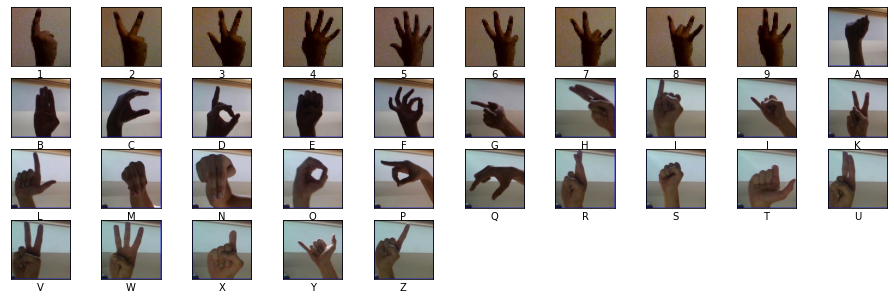

In [10]:
def plot_sample_images():
    figure = plt.figure()
    plt.figure(figsize=(16,5))

    for i in range (0,35):
        plt.subplot(4,10,i+1)
        plt.xticks([])
        plt.yticks([])
        path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
        img = plt.imread(path)
        plt.imshow(img)
        plt.xlabel(classes[i])
        
plot_sample_images()

In [11]:
def preprocess_data(X, y):
    np_X = np.array(X)
    normalised_X = np_X.astype('float32')/255.0
    
    label_encoded_y = utils.to_categorical(y)
    
    x_train, x_test, y_train, y_test = train_test_split(normalised_X, label_encoded_y, test_size = 0.1)
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = preprocess_data(X, y)

In [12]:
print("Training data:", x_train.shape)
print("Test data:", x_test.shape)

Training data: (91017, 32, 32, 3)
Test data: (10113, 32, 32, 3)


In [17]:
classes = 35
batch = 32
epochs = 5
learning_rate = 0.001

In [18]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(classes, activation='softmax'))

In [19]:
adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
#model.summary()

In [20]:
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.2, shuffle = True, verbose=1)

Epoch 1/5
2276/2276 [==============================] - 201s 88ms/step - loss: 0.5006 - accuracy: 0.8512 - val_loss: 0.1912 - val_accuracy: 0.9341
Epoch 2/5
2276/2276 [==============================] - 234s 103ms/step - loss: 0.1126 - accuracy: 0.9667 - val_loss: 0.2474 - val_accuracy: 0.9417
Epoch 3/5
2276/2276 [==============================] - 253s 111ms/step - loss: 0.0833 - accuracy: 0.9775 - val_loss: 0.2517 - val_accuracy: 0.9380
Epoch 4/5
2276/2276 [==============================] - 246s 108ms/step - loss: 0.0630 - accuracy: 0.9832 - val_loss: 0.0300 - val_accuracy: 0.9912
Epoch 5/5
2276/2276 [==============================] - 269s 118ms/step - loss: 0.0502 - accuracy: 0.9870 - val_loss: 0.2930 - val_accuracy: 0.9448


In [21]:
  test_loss, test_acc = model.evaluate(x_test, y_test)
  print('Test accuracy:', test_acc)
  print('Test loss:', test_loss)

317/317 [==============================] - 8s 25ms/step - loss: 0.3010 - accuracy: 0.9453
Test accuracy: 0.9453179240226746
Test loss: 0.3009864389896393


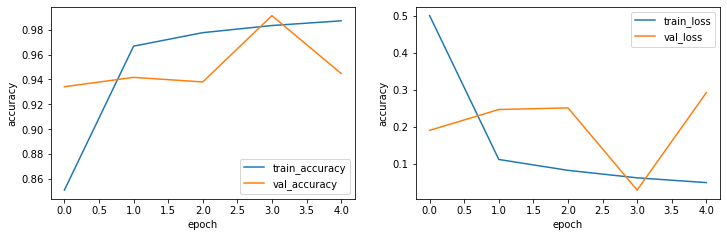

In [23]:
def plot_results(model):

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()


    
plot_results(model)

In [24]:
model.save('my_model.h5')

In [9]:
width = 640
height = 480

In [10]:
def preprocessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = img/255
    return img

In [7]:
loaded_model = load_model('my_model.h5')

In [8]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 128)        

In [27]:
x_test.shape

(10113, 32, 32, 3)

In [29]:
y_pred = np.argmax(loaded_model.predict(x_test),axis = 1) 

In [28]:
pred = loaded_model.predict(x_test)

In [30]:
pred.shape

(10113, 35)

In [31]:
y_pred.shape

(10113,)

In [32]:
alphabet = "123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"

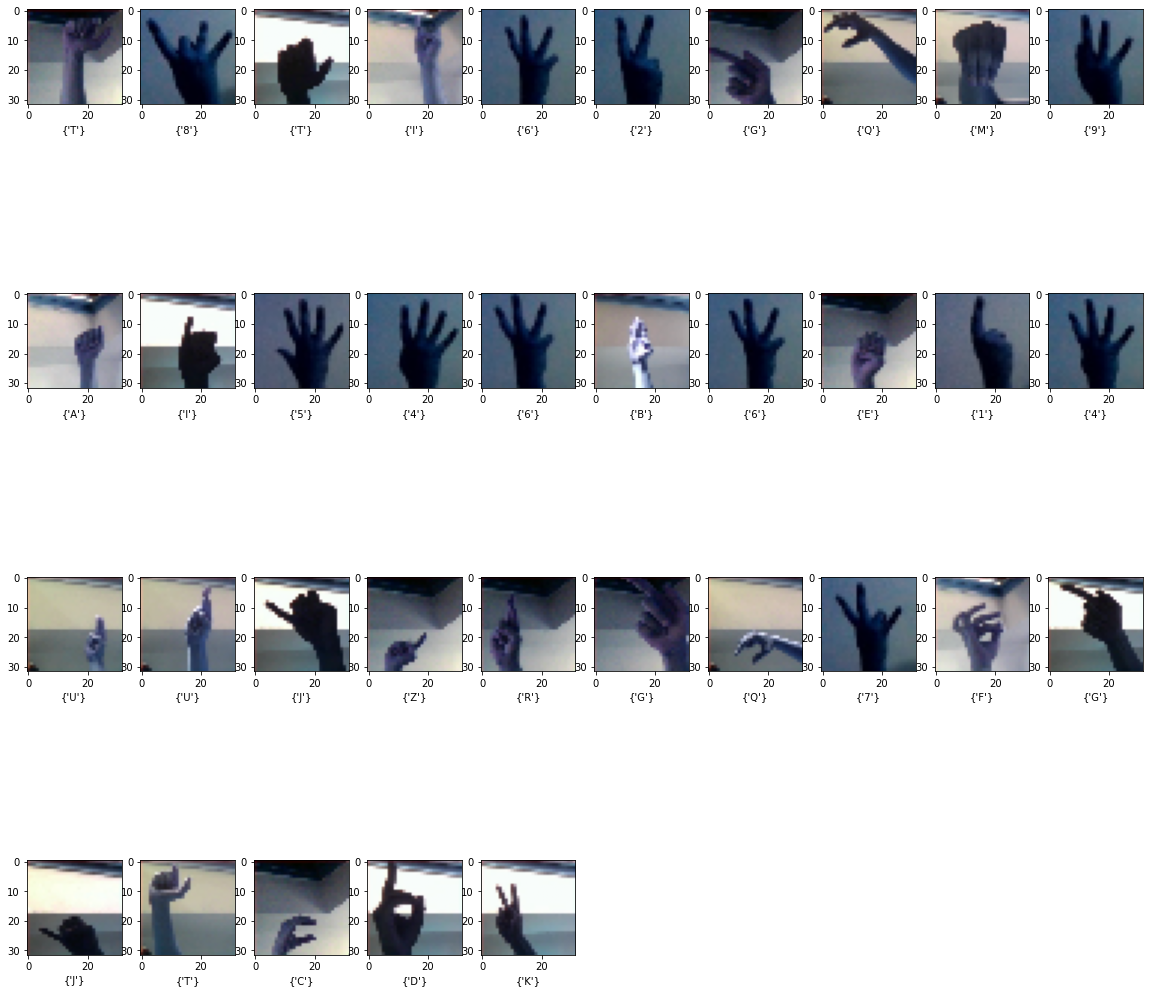

In [41]:
plt.figure(figsize=(20,20))
for i in range(35):
    plt.subplot(4,10,i+1)
    plt.imshow(x_test[i])
    plt.xlabel({alphabet[y_pred[i]]})

In [4]:
pip install visualkeras